<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [88]:
import pandas as pd

Load the dataset into a dataframe.


In [89]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [91]:
# due to the the dataset not be cleaned as suggested by the lab, replace all nan values for the column with its median
df['ConvertedComp'].isnull().sum()

816

In [92]:
#replace the missing values with the median value
median_value = df['ConvertedComp'].median()
median_value

57745.0

In [93]:
# your code goes here
df['ConvertedComp'].replace(np.nan, median_value, inplace = True)
df['ConvertedComp'].isnull().sum()

0

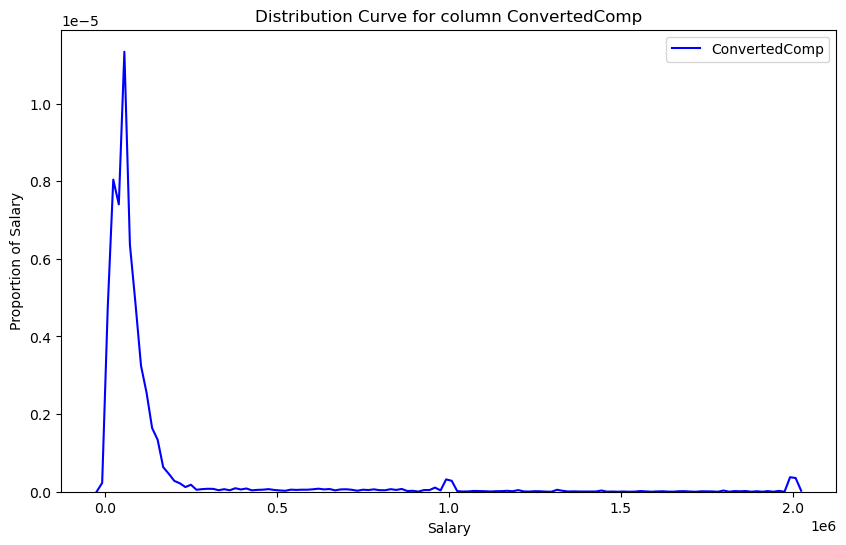

In [94]:
plt.figure(figsize=(10,6))

sns.kdeplot(data = df['ConvertedComp'], color ='blue')
plt.title("Distribution Curve for column ConvertedComp")
plt.xlabel("Salary")
plt.ylabel("Proportion of Salary")
plt.show()

Plot the histogram for the column `ConvertedComp`.


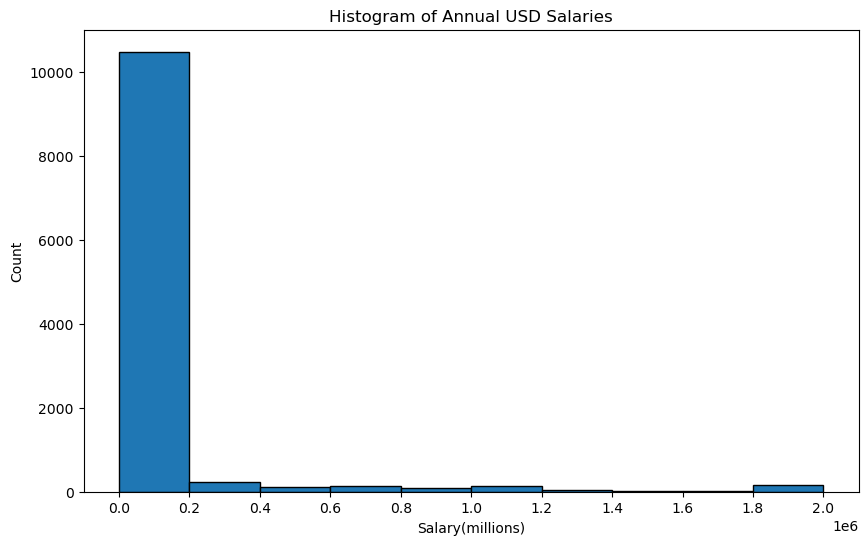

In [95]:
count, bin_edges = np.histogram(df['ConvertedComp'], bins =10)
plt.figure(figsize=(10,6))
plt.hist(x=df['ConvertedComp'], bins=10, edgecolor='black')
plt.title("Histogram of Annual USD Salaries")
plt.xticks(bin_edges)
plt.xlabel("Salary(millions)")
plt.ylabel("Count")
plt.show()

What is the median of the column `ConvertedComp`?


In [96]:
median_value = df['ConvertedComp'].median()
print(f"The median of the column ConvertedComp is {median_value}")

The median of the column ConvertedComp is 57745.0


How many responders identified themselves only as a **Man**?


In [97]:
# drop the nan values in the column
df['Gender'].isnull().sum()

73

In [98]:
df.dropna(subset=['Gender'], inplace=True)

In [99]:
df['Gender'].isnull().sum()

0

In [100]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [101]:
print("The number of responders indetified as male is:", df['Gender'].value_counts()[0])

The number of responders indetified as male is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [102]:
median = df.query("Gender == 'Woman'")['ConvertedComp'].median()
print("The median of salaries of femal respondents is:", round(median))

The median of salaries of femal respondents is: 57745


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [103]:
df['Age'].isnull().sum()

282

In [104]:
mean_age = df['Age'].mean()
df['Age'].replace(np.nan, mean_age, inplace=True)


In [105]:
df['Age'].isnull().sum()

0

In [106]:
age = df['Age'].describe()

age_min = round(age['min'])
age_q1 = round(age['25%'])
age_median = round(age['50%'])
age_q3 = round(age['75%'])
age_max = round(age['max'])

print("Minimum age:", age_min)
print("25th percentile (Q1) age:", age_q1)
print("Median age:", age_median)
print("75th percentile (Q3) age:", age_q3)
print("Maximum age:", age_max)

Minimum age: 16
25th percentile (Q1) age: 26
Median age: 29
75th percentile (Q3) age: 34
Maximum age: 99


Plot a histogram of the column `Age`.


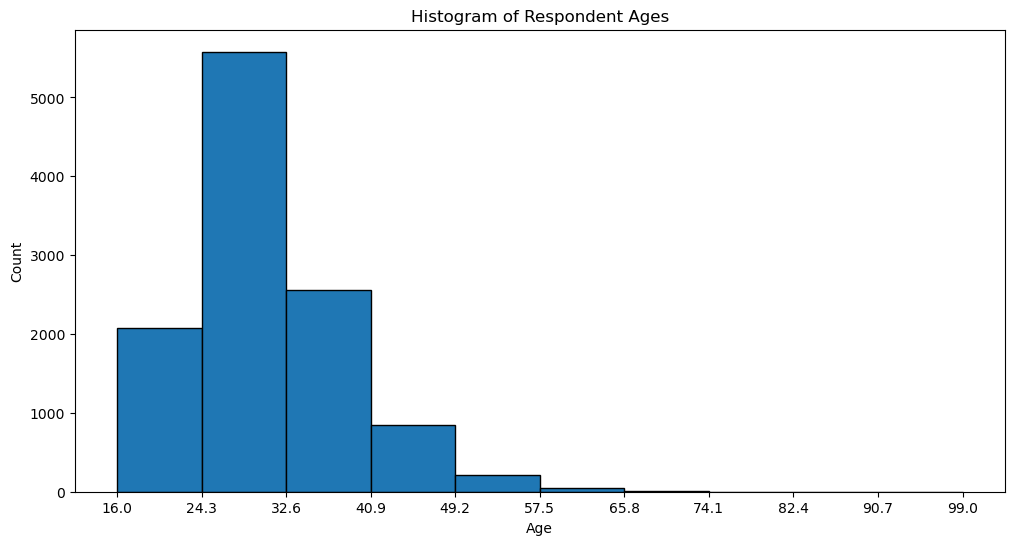

In [107]:
count, bin_edges = np.histogram(df['Age'], bins = 10)

plt.figure(figsize=(12,6))
plt.hist(x=df['Age'], bins=10, edgecolor = 'black')
plt.title("Histogram of Respondent Ages")
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(bin_edges)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


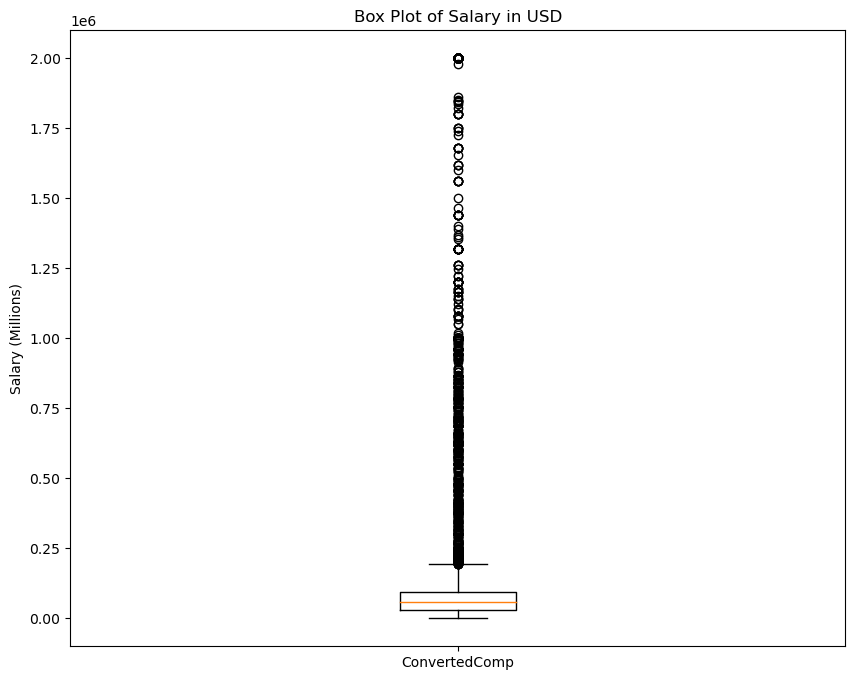

In [108]:
plt.figure(figsize=(10,8))
plt.boxplot(df['ConvertedComp'], vert=True, labels=['ConvertedComp'])
plt.title('Box Plot of Salary in USD')
plt.ylabel("Salary (Millions)")
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [109]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range =", IQR)

Inter Quartile Range = 65972.0


Find out the upper and lower bounds.


In [110]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Upper Bound =", upper_bound)
print("Lower Bound =", lower_bound)


Upper Bound = 193958.0
Lower Bound = -69930.0


Identify how many outliers are there in the `ConvertedComp` column.


In [111]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 927


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [112]:
new_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [113]:
numerical_columns = df.select_dtypes(include=[np.number])
numerical_columns.corr()['Age']

Respondent       0.001830
CompTotal        0.007097
ConvertedComp    0.102270
WorkWeekHrs      0.036047
CodeRevHrs      -0.020606
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
